# 숙제 : Tagging 문제

In [1]:
import nltk
nltk.download('conll2000')
nltk.download('universal_tagset')

[nltk_data] Downloading package conll2000 to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [2]:
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

In [8]:
conda install scikit-learn

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/jeon-yewon/miniforge3/envs/tensorflow

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    threadpoolctl-3.5.0        |   py39h33ce5c2_0          43 KB
    ------------------------------------------------------------
                                           Total:          43 KB

The following NEW packages will be INSTALLED:

  scikit-learn       pkgs/main/osx-arm64::scikit-learn-1.4.2-py39h46d7db6_1 
  threadpoolctl      pkgs/main/osx-arm64::threadpoolctl-3.5.0-py39h33ce5c2_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [46]:
conll_corpus = conll2000.tagged_sents(tagset='universal')

In [47]:
conll_corpus[0]

[('Confidence', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('pound', 'NOUN'),
 ('is', 'VERB'),
 ('widely', 'ADV'),
 ('expected', 'VERB'),
 ('to', 'PRT'),
 ('take', 'VERB'),
 ('another', 'DET'),
 ('sharp', 'ADJ'),
 ('dive', 'NOUN'),
 ('if', 'ADP'),
 ('trade', 'NOUN'),
 ('figures', 'NOUN'),
 ('for', 'ADP'),
 ('September', 'NOUN'),
 (',', '.'),
 ('due', 'ADJ'),
 ('for', 'ADP'),
 ('release', 'NOUN'),
 ('tomorrow', 'NOUN'),
 (',', '.'),
 ('fail', 'VERB'),
 ('to', 'PRT'),
 ('show', 'VERB'),
 ('a', 'DET'),
 ('substantial', 'ADJ'),
 ('improvement', 'NOUN'),
 ('from', 'ADP'),
 ('July', 'NOUN'),
 ('and', 'CONJ'),
 ('August', 'NOUN'),
 ("'s", 'PRT'),
 ('near-record', 'ADJ'),
 ('deficits', 'NOUN'),
 ('.', '.')]

In [48]:
print(len(conll_corpus))

10948


In [49]:
sentences = [[(word.lower(), tag) for word, tag in sentence] for sentence in conll_corpus]

In [50]:
train_data, test_data = train_test_split(sentences, test_size=0.2, random_state=42)

In [51]:
from nltk.tag import UnigramTagger
unigram_tagger = UnigramTagger(train_data)

In [52]:
accuracy = unigram_tagger.evaluate(test_data)
print(f"정확도: {accuracy:.4f}")

정확도: 0.9285


In [54]:
sentences = []
tags = []

for tagged_sentence in conll_corpus:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    tags.append(list(tag_info))

In [55]:
print("문장 개수:", len(sentences))
print("태그 개수:", len(tags))

문장 개수: 10948
태그 개수: 10948


In [56]:
print(sentences[0])

['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.']


In [57]:
print(tags[0])

['NOUN', 'ADP', 'DET', 'NOUN', 'VERB', 'ADV', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'ADP', 'NOUN', '.', 'ADJ', 'ADP', 'NOUN', 'NOUN', '.', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'CONJ', 'NOUN', 'PRT', 'ADJ', 'NOUN', '.']


In [58]:
sentence_lengths = [len(sentence) for sentence in sentences]

In [59]:
print('최대 문장 길이:', max(sentence_lengths))
print('평균 문장 길이:', np.mean(sentence_lengths))

최대 문장 길이: 78
평균 문장 길이: 23.66678845451224


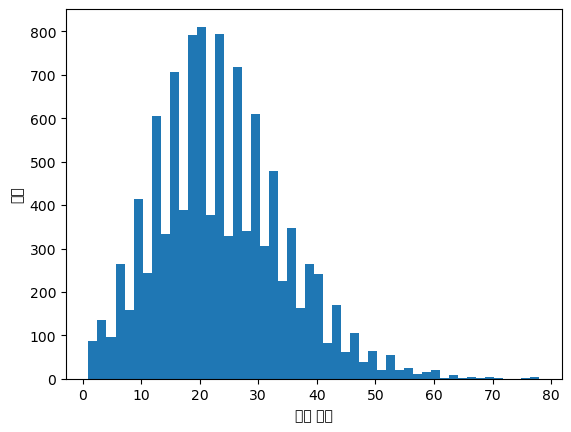

In [60]:
import warnings
warnings.filterwarnings(action='ignore')

plt.hist(sentence_lengths, bins=50)
plt.xlabel('문장 길이')
plt.ylabel('개수')
plt.show()

In [61]:
max_words = 4000

src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(tags)

vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1

In [62]:
print('단어 집합 크기:', vocab_size)
print('태깅 집합 크기:', tag_size)

단어 집합 크기: 4000
태깅 집합 크기: 13


In [63]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(tags)

In [64]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

In [65]:
decoded = [index_to_word[index] for index in X_train[0]]

In [66]:
max_len = 70

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [68]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [69]:
print('훈련 데이터:', X_train.shape, y_train.shape)
print('검증 데이터:', X_test.shape, y_test.shape)

훈련 데이터: (8758, 70) (8758, 70, 13)
검증 데이터: (2190, 70) (2190, 70, 13)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 128)           512000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 70, 512)           788480    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 70, 13)            6669      
 stributed)                                                      
                                                                 
Total params: 1307149 (4.99 MB)
Trainable params: 1307149 (4.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [78]:
history = model.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=20, 
                    validation_data=(X_test, y_test), 
                    callbacks=[es, mc])

Epoch 1/20
69/69 [==============================] - ETA: 0s - loss: 0.9374 - accuracy: 0.7371
Epoch 1: val_loss improved from inf to 0.71543, saving model to best_model.h5
69/69 [==============================] - 45s 638ms/step - loss: 0.9374 - accuracy: 0.7371 - val_loss: 0.7154 - val_accuracy: 0.7594
Epoch 2/20
69/69 [==============================] - ETA: 0s - loss: 0.6336 - accuracy: 0.7909
Epoch 2: val_loss improved from 0.71543 to 0.49992, saving model to best_model.h5
69/69 [==============================] - 45s 650ms/step - loss: 0.6336 - accuracy: 0.7909 - val_loss: 0.4999 - val_accuracy: 0.8668
Epoch 3/20
69/69 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.9236
Epoch 3: val_loss improved from 0.49992 to 0.13112, saving model to best_model.h5
69/69 [==============================] - 43s 620ms/step - loss: 0.2826 - accuracy: 0.9236 - val_loss: 0.1311 - val_accuracy: 0.9681
Epoch 4/20
69/69 [==============================] - ETA: 0s - loss: 0.0844 - acc

In [79]:
print('테스트 정확도:', model.evaluate(X_test, y_test)[1])

69/69 [==============================] - 6s 85ms/step - loss: 0.0428 - accuracy: 0.9868
테스트 정확도: 0.986849308013916


In [4]:
# 강사님 코드

In [5]:
import nltk
nltk.download('conll2000')
nltk.download('universal_tagset')

[nltk_data] Downloading package conll2000 to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [6]:
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

In [7]:
conll_corpus = conll2000.tagged_sents(tagset='universal')

In [8]:
conll_corpus[0]

[('Confidence', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('pound', 'NOUN'),
 ('is', 'VERB'),
 ('widely', 'ADV'),
 ('expected', 'VERB'),
 ('to', 'PRT'),
 ('take', 'VERB'),
 ('another', 'DET'),
 ('sharp', 'ADJ'),
 ('dive', 'NOUN'),
 ('if', 'ADP'),
 ('trade', 'NOUN'),
 ('figures', 'NOUN'),
 ('for', 'ADP'),
 ('September', 'NOUN'),
 (',', '.'),
 ('due', 'ADJ'),
 ('for', 'ADP'),
 ('release', 'NOUN'),
 ('tomorrow', 'NOUN'),
 (',', '.'),
 ('fail', 'VERB'),
 ('to', 'PRT'),
 ('show', 'VERB'),
 ('a', 'DET'),
 ('substantial', 'ADJ'),
 ('improvement', 'NOUN'),
 ('from', 'ADP'),
 ('July', 'NOUN'),
 ('and', 'CONJ'),
 ('August', 'NOUN'),
 ("'s", 'PRT'),
 ('near-record', 'ADJ'),
 ('deficits', 'NOUN'),
 ('.', '.')]

In [9]:
X_data = []
y_data = []

for sentences in conll_corpus:
    X_sentence = []
    y_sentence = []
    for words in sentences:
        X_sentence.append(words[0])
        y_sentence.append(words[1])

    X_data.append(X_sentence)
    y_data.append(y_sentence)

In [10]:
print(X_data[0], y_data[0])

['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.'] ['NOUN', 'ADP', 'DET', 'NOUN', 'VERB', 'ADV', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'ADP', 'NOUN', '.', 'ADJ', 'ADP', 'NOUN', 'NOUN', '.', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'CONJ', 'NOUN', 'PRT', 'ADJ', 'NOUN', '.']


In [11]:
print(len(X_data), len(y_data))

10948 10948


In [13]:
num_words = len(set([word.lower() for sentence in X_data for word in sentence]))
num_tags = len(set([word.lower() for sentence in y_data for word in sentence]))

print(num_words, num_tags)

19460 12


In [14]:
print('최대 길이 : ', max(len(l) for l in X_data))
print('평균 길이 : ', sum(map(len, X_data)) / len(X_data))

최대 길이 :  78
평균 길이 :  23.66678845451224


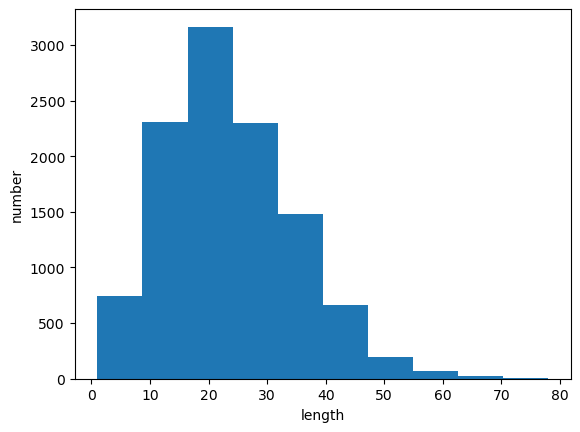

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.hist([len(s) for s in X_data])
plt.xlabel('length')
plt.ylabel('number')
plt.show()

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
X_vectorized = tokenizer.texts_to_sequences(X_data)

In [19]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(y_data)
y_encoded = tag_tokenizer.texts_to_sequences(y_data)

In [20]:
print('Original Data')
print('X : ', X_data[0])
print('Y : ', y_data[0])

print('\nEncoded Data')
print('X : ', X_vectorized[0])
print('Y : ', y_encoded[0])

Original Data
X :  ['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.']
Y :  ['NOUN', 'ADP', 'DET', 'NOUN', 'VERB', 'ADV', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'ADP', 'NOUN', '.', 'ADJ', 'ADP', 'NOUN', 'NOUN', '.', 'VERB', 'PRT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'CONJ', 'NOUN', 'PRT', 'ADJ', 'NOUN', '.']

Encoded Data
X :  [1571, 7, 2, 1847, 15, 1088, 190, 5, 202, 242, 1089, 5757, 73, 378, 604, 9, 469, 1, 249, 9, 1645, 2736, 1, 4780, 5, 569, 6, 1258, 1366, 22, 727, 8, 503, 10, 7251, 7252, 3]
Y :  [1, 4, 5, 1, 2, 8, 2, 9, 2, 5, 6, 1, 4, 1, 1, 4, 1, 3, 6, 4, 1, 1, 3, 2, 9, 2, 5, 6, 1, 4, 1, 11, 1, 9, 6, 1, 3]


In [21]:
vocab_size = len(tokenizer.word_index)+1
tag_size = len(tag_tokenizer.word_index)+1

print(vocab_size, tag_size)

19461 13


In [30]:
# max_len 설정
max_len = 80

# X_data와 y_data 패딩 적용
X_data = pad_sequences(X_vectorized, padding='post', maxlen=max_len)
y_data = pad_sequences(y_encoded, padding='post', maxlen=max_len)

In [31]:
from tensorflow.keras.utils import to_categorical

# y_data를 정수형으로 변환 후, 3차원 배열로 변환
y_data = np.array(y_data, dtype='int')

In [32]:
# y_data를 one-hot encoding으로 변환
num_classes = np.max(y_data) + 1
y_data = to_categorical(y_data, num_classes=num_classes)

print(y_data.shape)  # 확인용 출력

(10948, 80, 13)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8758, 80) (8758, 80, 13)
(2190, 80) (2190, 80, 13)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, TimeDistributed, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [41]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          1245504   
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, None, 13)          1677      
 stributed)                                                      
                                                                 
Total params: 1313229 (5.01 MB)
Trainable params: 1313229 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [45]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])



Epoch 1/20
137/137 [==============================] - ETA: 0s - loss: 0.4984 - acc: 0.8434
Epoch 1: val_acc improved from -inf to 0.92001, saving model to best_model.h5
137/137 [==============================] - 17s 124ms/step - loss: 0.4984 - acc: 0.8434 - val_loss: 0.2868 - val_acc: 0.9200
Epoch 2/20
  1/137 [..............................] - ETA: 14s - loss: 0.2628 - acc: 0.9271

/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - ETA: 0s - loss: 0.1431 - acc: 0.9623
Epoch 2: val_acc improved from 0.92001 to 0.98271, saving model to best_model.h5
137/137 [==============================] - 20s 143ms/step - loss: 0.1431 - acc: 0.9623 - val_loss: 0.0755 - val_acc: 0.9827
Epoch 3/20
137/137 [==============================] - ETA: 0s - loss: 0.0443 - acc: 0.9906
Epoch 3: val_acc improved from 0.98271 to 0.98789, saving model to best_model.h5
137/137 [==============================] - 20s 145ms/step - loss: 0.0443 - acc: 0.9906 - val_loss: 0.0445 - val_acc: 0.9879
Epoch 4/20
137/137 [==============================] - ETA: 0s - loss: 0.0250 - acc: 0.9940
Epoch 4: val_acc improved from 0.98789 to 0.98933, saving model to best_model.h5
137/137 [==============================] - 20s 144ms/step - loss: 0.0250 - acc: 0.9940 - val_loss: 0.0364 - val_acc: 0.9893
Epoch 5/20
137/137 [==============================] - ETA: 0s - loss: 0.0177 - acc: 0.9954
Epoch 5: val_acc improved from 0

In [46]:
print('test acc : ', model.evaluate(X_test, y_test)[1])

69/69 [==============================] - 3s 43ms/step - loss: 0.0349 - acc: 0.9907
test acc :  0.9907077550888062


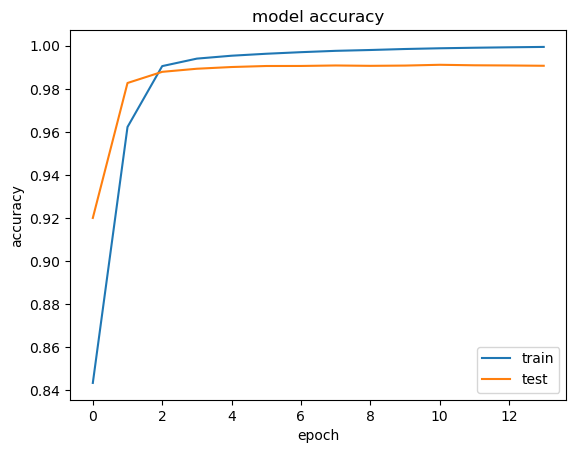

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()